<a href="https://colab.research.google.com/github/Sadieluc/SignLanguage/blob/main/Copy_of_Colab_Image_Handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Colab Image Handling



## Camera Capture
Using a webcam to capture images for processing on the runtime.

In [5]:
# Connecting Colab To google drive 
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [7]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='/drive/My Drive/photo.jpg', quality=1.0):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to /drive/My Drive/photo.jpg


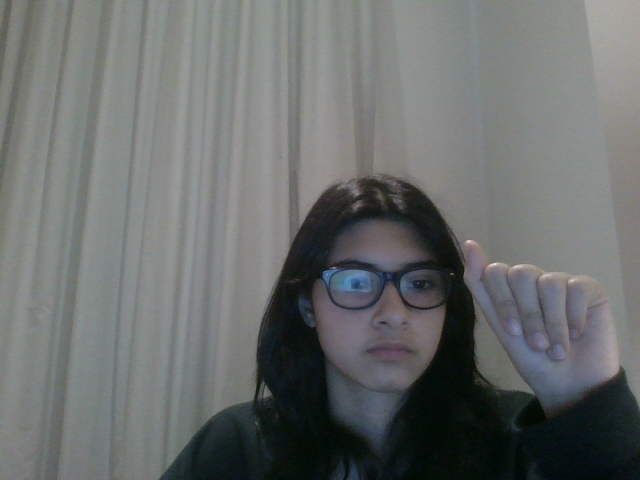

In [8]:
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

### VirtualBox VM Browser Access to the Camera

In the peculiar case where you are evaluating the Colab notebook in the Web Browser, you will need to enable camera access for the VM.

```
    > VirtualBoxManage list webcams
        Video Input Devices: 1
        .1 "Integrated Camera"
        \\?\usb#vid_04f2&pid_b5ab&mi_00#6&b0e92e&0&0000#{65e8773d-8f56-11d0-a3b9-00a0c9223196}\global

   > VirtualBoxManage list vms
        "JF-Mint-AID" {b89f613e-71ed-490d-a232-969e3645a93f}
        "mli-macOS-mojave" {600697f8-8dd4-4040-b75e-d560f6b314bc}

   > VirtualBoxManage vbm controlvm "JF-Mint-AID" webcam attach .1
   ```

The browser in the VM will now have (slow and clunky) access to the VM.

### End of Notebook.